# Lab 1
The goal of this lab is to get you started with python and familiarize you with a few commands related to distributions and plotting. It's not a tutorial though, and you may need to refer to other resources if you don't have any experience with python. Some of the exercises are based on the problems solved in the pre-asssement test.

## Set-up
First, we need to import some useful libraries:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
print("Modules Imported!")

Modules Imported!


## A simple Bayesian Network: Conditional and joint distributions

Let us construct a simple network in which Traffic and Charlie influence Bob being on time or not, similar to what was discussed in class. One of the goals of this excercise is just to get used to [Numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html) arrays.

We let

In [3]:
TrafficPD = np.zeros(2)
TrafficPD[0] = .65 
TrafficPD[1] = 1 - TrafficPD[0]

CharliePD = np.zeros(2)
CharliePD[0] = .9 
CharliePD[1] = 1 - CharliePD[0] 

BobCPD = np.zeros((2,2,2)) # 1st index Bob, 2nd index Charlie, 3rd index Traffic: BobCPD(i,j,k) = Pr(B=i|C=j,T=k)
BobCPD[1] = [[0.1,1/3],[1/4,1]] 
BobCPD[0] = 1 - BobCPD[1]
print('hello')

hello


#### _$\color{red}{Exercise\  1}$_: 
Find the following quantities: 
- joint probability distribution for all variables
- $\Pr(T=1\mid B=1)$ 
- $\Pr(T=1\mid B=1,C=1)$ 

In [94]:
AllPD = np.zeros((2,2,2)) # AllPD(i,j,k) = Pr(B=i,C=j,T=k)
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            AllPD[i][j][k] = TrafficPD[k]*CharliePD[j]*BobCPD[i][j][k]
print('Joint distribution:')
print(AllPD)

Traffic1ConditionalBob1 = (AllPD[1][0][1]+AllPD[1][1][1]) / (AllPD[1][0][1]+AllPD[1][1][0]+AllPD[1][0][0]+AllPD[1][1][1])
print('Probability of T=1 given B=1:')
print(Traffic1ConditionalBob1)

Traffic1ConditionalBob1Charlie1 = AllPD[1][1][1]/(AllPD[1][1][1]+AllPD[1][1][0])
print('Probability of T=1 given B=C=1:')
print(Traffic1ConditionalBob1Charlie1)

Joint distribution:
[[[0.5265  0.21   ]
  [0.04875 0.     ]]

 [[0.0585  0.105  ]
  [0.01625 0.035  ]]]
Probability of T=1 given B=1:
0.6519208381839348
Probability of T=1 given B=C=1:
0.6829268292682926


## Ploting pdf and CDF

In Python, distributions and related functions can be created using scipy.stat. The general form is (using st for scipy.stat, assuming 2 parameters):
```python
myRV = st.RVName(param1,param2,loc=0,scale=1)
```
Enter the loc and scale parameters if they are different from the default. You can then get the pdf at x as
```python
myRV.pdf(x)
```

#### _$\color{red}{Example\  1}$_: 

We will see this for the Beta distribution below. The Beta distributon has two parameters $\alpha$ and $\beta$ (called shape parameters).

(-0.05273405753668501, 2.2)

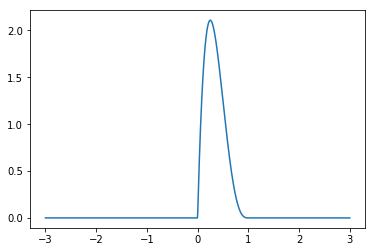

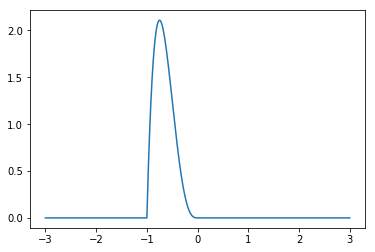

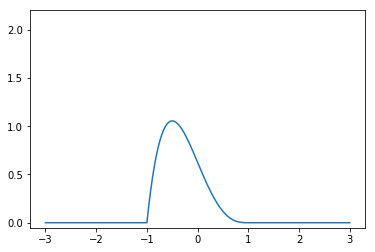

In [4]:
mybeta = st.beta(2,4) # default location and scale
r = np.linspace(-3,3,1000)
plt.plot(r,mybeta.pdf(r))
mybeta1 = st.beta(2,4,-1) # shift 1 to the left
plt.figure()
plt.plot(r,mybeta1.pdf(r))
mybeta2 = st.beta(2,4,-1,2) # shift 1 to the left and scale by 2
plt.figure()
plt.plot(r,mybeta2.pdf(r))
plt.ylim(top=2.2)  # adjust the top leaving bottom unchanged, so that the axis limits are similar to previous plots

In Scipy, the normal random variable is defined using its location and scale as `st.norm(loc,scale)`. The location represents the mean and the scale represents the standard deviation:

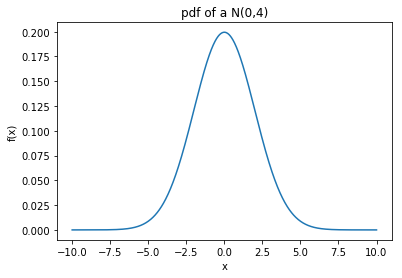

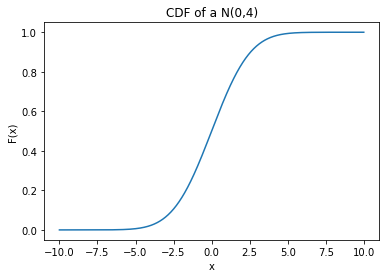

In [8]:
mynorm = st.norm(0,2)  # normal RV with mean 0 and variance 4 (standard deviation 2)
r = np.linspace(-10,10,1000)
plt.plot(r,mynorm.pdf(r))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('pdf of a N(0,4)')
plt.figure()
plt.plot(r,mynorm.cdf(r))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of a N(0,4)')

#### _$\color{red}{Exercise\  2}$_: 
Plot the pdf and CDF for exponential distribution of rate 3 (mean and standard deviation 1/3), denoted $\mathcal{Exp}(3)$. Use [st.expon(location,scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

Plot the pdf and CDF for following two Gamma distributions using [st.gamma(a,loc,scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html):
1. Pick arbitrary parameters you like.
2. Gamma distribution representing the sum of two iid exponential random variables of rate 3.



Exponential with rate parameter 3, Exp(3), (mean and standard deviation 1/3)
Gamma which has arbitrary parameters
Gamma which has distn equal to that of Exp(3)+Exp(3)


Text(0.5, 1.0, 'CDF of Gamma(2, 3) which has distn equal to that of Exp(3)+Exp(3)')

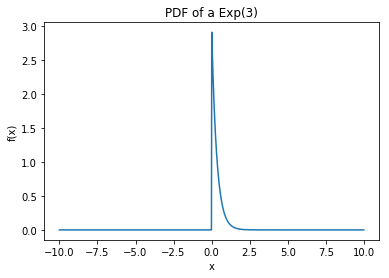

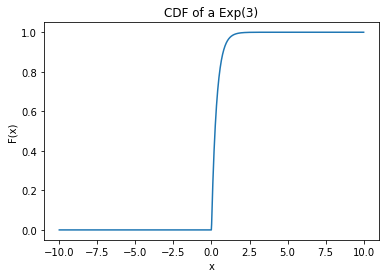

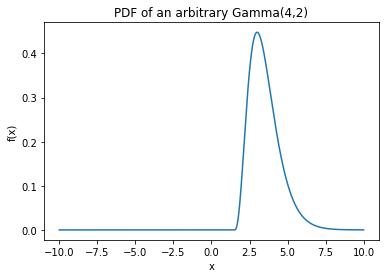

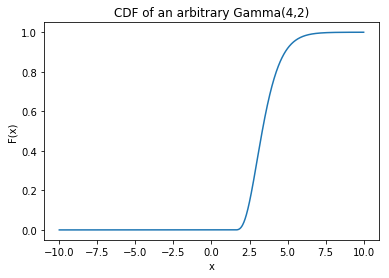

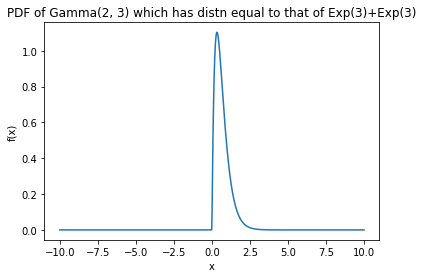

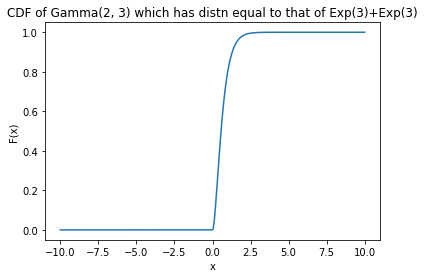

In [95]:
r = np.linspace(-10,10,1000) # range of random variable

print("Exponential with rate parameter 3, Exp(3), (mean and standard deviation 1/3)") # figure title
myexpon = st.expon(0, scale=1.0/3) # lamba=3
plt.plot(r,myexpon.pdf(r))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PDF of a Exp(3)')
plt.figure()
plt.plot(r,myexpon.cdf(r))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of a Exp(3)')


print("Gamma which has arbitrary parameters") # figure title
mygamma = st.gamma(a=4,loc=1.5,scale=0.5)# a=1  exp(-x)  scale
plt.figure()
plt.plot(r,mygamma.pdf(r))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PDF of an arbitrary Gamma(4,2)')
plt.figure()
plt.plot(r,mygamma.cdf(r))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of an arbitrary Gamma(4,2)')



print("Gamma which has distn equal to that of Exp(3)+Exp(3)") # figure title
mygamma = st.gamma(2,0,scale=1/3) # Gamma(n=2, beta=1/lambda)
plt.figure()
plt.plot(r,mygamma.pdf(r))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PDF of Gamma(2, 3) which has distn equal to that of Exp(3)+Exp(3)')
plt.figure()
plt.plot(r,mygamma.cdf(r))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of Gamma(2, 3) which has distn equal to that of Exp(3)+Exp(3)')


## Sampling from distributions
Law of large numbers (LLN) states that under certain conditions the average of many samples of a random variable goes to its expected value as the number of samples increases. 
$$\frac1n\sum_{i=1}^n X_i\to E[X] \text{  as  } n\to \infty $$
This allows us to estimate the mean and variance of a RV by taking many samples. For variance, in the above equation, we replace $X$ with $(X-E[X])^2$. 

#### _$\color{red}{Example\  2}$_:

In the following example, we estimate the mean and variance of $\mathcal N(0,4)$ by sampling.

In [5]:
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
m = sum(X)/len(X) # Average as an estimate of mean
print(m) # Compare with 0
v = sum([(x-m)*(x-m) for x in X])/len(X)
print(v) # Compare with 4

0.00602047157063
3.98614364417


#### _$\color{red}{Exercise\  3}$_: 
Let $X\sim \mathcal N(0,4)$ and $Y\sim \mathcal N(3,25)$. By generating samples, estimate $E[X+Y^2]$, $EX+(E[Y])^2$, $EX+E[Y^2],$ and compare the estimates.

In [96]:
num_samples=10000
X = st.norm.rvs(0,2,size=num_samples) # Getting 10000 samples from N(0,4)
Y = st.norm.rvs(3,5,size=num_samples) # Getting 10000 samples from N(3,25)
EXY2 = sum([X[i]+Y[i]*Y[i] for i in range(num_samples)])/num_samples
print("E[X+Y^2]:",EXY2)
EX = sum([X[i] for i in range(num_samples)])/num_samples
EY = sum([Y[i] for i in range(num_samples)])/num_samples
print("E[X]+E[Y]^2:",EX+EY*EY)
EY2 = sum([Y[i]*Y[i] for i in range(num_samples)])/num_samples
print("E[X]+E[Y^2]:",EX+EY2)
print("comparing results : E[X+Y^2] = E[X]+E[Y^2] > E[X]+E[Y]^2")

E[X+Y^2]: 33.83034938203224
E[X]+E[Y]^2: 8.757626876554113
E[X]+E[Y^2]: 33.83034938203211
comparing results : E[X+Y^2] = E[X]+E[Y^2] > E[X]+E[Y]^2


## Samples and histogram
If we take many samples from a given distribution, the histogram of those samples will be similar to the pdf because the fraction of samples in each small interval around a given value tends to the value of the pdf at that point when the number of samples is large. We can see this in action. (Natuarally, this can be used to estimate the pdf from samples. The method is called [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).)

#### _$\color{red}{Example\  2}$_:

In the following example, we estimate the pdf of $\mathcal N(0,4)$ through [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

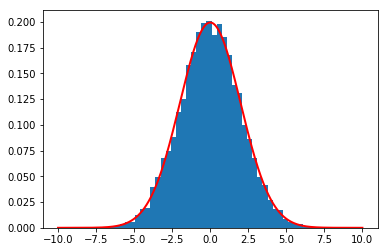

In [92]:
mynorm = st.norm(0,2)  # normal RV with mean 0 and variance 4, N(0,4)
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
plt.hist(X,50,normed=True)#  1/nh * K((x-xi/h)   h: width
r = np.linspace(-10,10,1000)
plt.plot(r,mynorm.pdf(r),'r',linewidth=2.0)

#### _$\color{red}{Exercise\  4}$_: 

In the review test, we saw that if $$X\sim N(1,1)$$ and $$Y\sim N(0,3^2),$$ and $X$ and $Y$ are jointly Gaussian with correlation coefficient $\rho$, then $$Z=2X+3Y-2\sim N(0,85+36\rho).$$ 

Suppose that $\rho=1/2$. Sample from the joint distribution for $X$, $Y$. To do this you need to use [scipy.stats.multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html). For each sample compute $Z$. Plot the histogram for these samples and verify that they match $\mathcal N(0,103)$. For convenience, let's fix number of samples to be 10000 and number of bins in hist to be 50, you can also try other values to see how good the hist matches with exact pdf. 

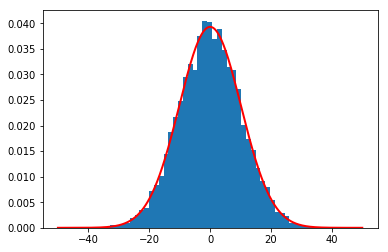

In [97]:
# We need to first create a multivariate normal random variable.
# For that we need to have its mean m and covariance matrix K.
m = [1,0]
K=[[1 , 3/2], [3/2, 9]]
num_samples=10000
myjointXY = st.multivariate_normal.rvs(mean=m, cov=K,size=num_samples)  # shape: [size, 2]     myjointXY={(xi, yi),.....}

# For each sample compute  𝑍
Z=np.zeros(num_samples)
for i in range(myjointXY.shape[0]):
    Z[i] = 2*myjointXY[i,0] + 3*myjointXY[i,1] - 2
    
# kernel 
plt.hist(Z,50,normed=True)

# normal N(0, 103)
mynorm = st.norm(0, np.sqrt(103)) 
r = np.linspace(-50,50,1000)
plt.plot(r,mynorm.pdf(r),'r',linewidth=2.0)